# Capstone Project 2025

## Load library

In [2]:
import os
import sys
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

print(sys.executable)

%matplotlib ipympl


/usr/bin/python3


## Load data

In [78]:
dataFile = '/tf/data/karena/data.csv'
df = pd.read_csv(dataFile)
df = df.drop(['Sample ID'], axis=1)
featureAry = df.drop(['Student', 'PostTest', 'EGG alpha', 'EGG beta', 'Average EDA'], axis=1).to_numpy() # Features
#df[['Student', 'PostTest']] # Labels
df

,Student,PostTest,PHQ-9,GAD-7,PSS-10,PERMA(P),PERMA(E),PERMA(R),PERMA (M),PERMA (A),PERMA(overall well-being score),WEMWBS,EGG alpha,EGG beta,Average EDA
0,1,False,3,4,22,7,7.33,8,8,8,8,51,0.049943,0.103714,-1.000000
1,1,True,5,2,4,8,8.00,9,8,8,8,56,0.035790,0.051580,-1.000000
2,2,False,11,7,18,5,7.00,7,5,5,6,40,0.028885,0.031310,-1.000000
3,2,True,4,3,20,9,10.00,9,10,9,9,66,0.032295,0.073615,-1.000000
4,3,False,4,4,17,7,7.00,6,6,5,6,49,-1.000000,-1.000000,4.661316
5,3,True,3,3,21,7,7.00,8,6,7,7,53,-1.000000,-1.000000,0.953149
6,4,False,10,8,20,6,7.00,6,6,6,6,42,-1.000000,-1.000000,0.826379
7,4,True,10,8,14,7,6.00,7,6,6,7,39,-1.000000,-1.000000,4.676589
8,5,False,5,11,22,9,9.00,8,10,7,9,50,0.053238,0.097417,-1.000000
9,5,True,3,2,20,7,8.00,8,7,6,7,45,0.058095,0.091130,-1.000000


## PCA classification

In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

In [79]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_pca = pca.fit_transform(featureAry)

# label_mapping = {label: idx for idx, label in enumerate(y.unique())}
# y_encoded = y.map(label_mapping)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
# # pca_df['label'] = key_df[[f'Pump{i}' for i in range(1, 6)]]*3
# # Split the data into training and testing sets
pca_df['Student'] = df['Student']
pca_df['PostTest'] = df['PostTest']
pca_df

,PC1,PC2,Student,PostTest
0,3.930032,2.724900,1,False
1,6.229161,-15.384506,1,True
2,-9.831593,1.448730,2,False
3,18.541860,-0.855921,2,True
4,0.346182,-1.393647,3,False
5,5.395823,1.566521,3,True
6,-7.412282,3.286735,4,False
7,-10.949037,-2.449006,4,True
8,2.003341,4.180169,5,False
9,-2.015996,0.959707,5,True


### Generate Decision boundary

In [87]:
le = LabelEncoder()
pca_df['PostTest_encoded'] = le.fit_transform(pca_df['PostTest'])

# Train an SVM classifier
X = pca_df[['PC1', 'PC2']].values
y = pca_df['PostTest_encoded'].values
svm = SVC(kernel='linear', C=1, gamma='auto', probability=True)  # Use RBF kernel
svm.fit(X, y)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict class probabilities for each point in the mesh
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


### Plot 

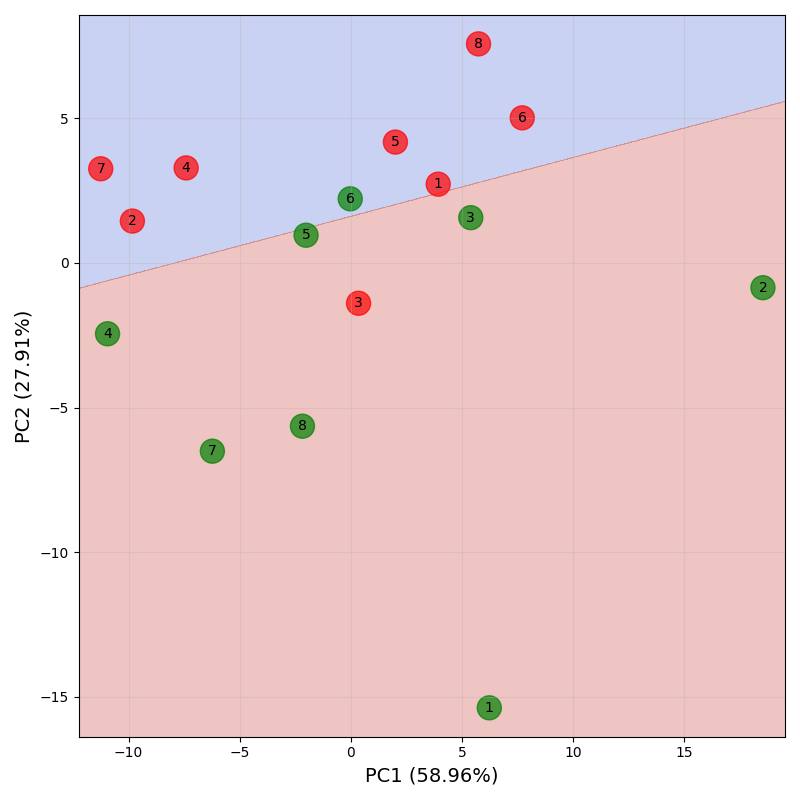

In [88]:
color_dict = {
    False: "red",
    True: "green",
}

plt.close('all')
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(8,8))
ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
pca_df.plot.scatter(ax=ax, 
            x='PC1', 
            y='PC2', 
            c=pca_df['PostTest'].map(color_dict),  # Map 'gas' to colors
            s=300, 
            alpha=0.7,
            )
for index, row in pca_df.iterrows():
    ax.text(row['PC1'], row['PC2'], pca_df['Student'][index],  va='center', ha='center')

ax.grid(which='major', alpha=0.3)
ax.grid(which='minor', alpha=0.1)
ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)", fontsize=14)
ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)", fontsize=14)

fig.tight_layout()